<a href="https://colab.research.google.com/github/yarathamed/Speech-Emotion-Recognition/blob/main/Final_assignment3_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
#from IPython.display import Audio
import IPython.display as ipd
from sklearn.model_selection import train_test_split
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='drive/MyDrive/assignment3_pattern/Crema'

#Loading an audio, listening to each of the classes and plotting waveform

In [ ]:
emotion_df = []
def readDataset(path):
   for wav in os.listdir(path):
      split = wav.partition(".wav")[0].split("_")
      if split[2] == 'SAD':
        emotion_df.append(("sad", path + "/" + wav))
      elif split[2] == 'ANG':
        emotion_df.append(("angry", path + "/" + wav))
      elif split[2] == 'DIS':
        emotion_df.append(("disgust", path + "/" + wav))
      elif split[2] == 'FEA':
        emotion_df.append(("fear", path + "/" + wav))
      elif split[2] == 'HAP':
        emotion_df.append(("happy", path + "/" + wav))
      elif split[2] == 'NEU':
        emotion_df.append(("neutral", path + "/" + wav))
      else:
        emotion_df.append(("unknown", path + "/" + wav))
   df = pd.DataFrame.from_dict(emotion_df)
   df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)
   print(emotion_df)

    #print(Crema_df.head())
   return df

In [ ]:
df = readDataset(path)
display(df)

[('angry', 'drive/MyDrive/assignment3_pattern/Crema/1081_IEO_ANG_MD.wav'), ('angry', 'drive/MyDrive/assignment3_pattern/Crema/1079_ITS_ANG_XX.wav'), ('neutral', 'drive/MyDrive/assignment3_pattern/Crema/1080_IEO_NEU_XX.wav'), ('fear', 'drive/MyDrive/assignment3_pattern/Crema/1079_DFA_FEA_XX.wav'), ('angry', 'drive/MyDrive/assignment3_pattern/Crema/1080_WSI_ANG_XX.wav'), ('neutral', 'drive/MyDrive/assignment3_pattern/Crema/1081_DFA_NEU_XX.wav'), ('angry', 'drive/MyDrive/assignment3_pattern/Crema/1079_WSI_ANG_XX.wav'), ('fear', 'drive/MyDrive/assignment3_pattern/Crema/1079_WSI_FEA_XX.wav'), ('angry', 'drive/MyDrive/assignment3_pattern/Crema/1080_TAI_ANG_XX.wav'), ('happy', 'drive/MyDrive/assignment3_pattern/Crema/1081_TIE_HAP_XX.wav'), ('disgust', 'drive/MyDrive/assignment3_pattern/Crema/1079_TIE_DIS_XX.wav'), ('neutral', 'drive/MyDrive/assignment3_pattern/Crema/1079_IEO_NEU_XX.wav'), ('happy', 'drive/MyDrive/assignment3_pattern/Crema/1079_TAI_HAP_XX.wav'), ('disgust', 'drive/MyDrive/assi

,Emotion,Path
0,angry,drive/MyDrive/assignment3_pattern/Crema/1081_I...
1,angry,drive/MyDrive/assignment3_pattern/Crema/1079_I...
2,neutral,drive/MyDrive/assignment3_pattern/Crema/1080_I...
3,fear,drive/MyDrive/assignment3_pattern/Crema/1079_D...
4,angry,drive/MyDrive/assignment3_pattern/Crema/1080_W...
...,...,...
7437,fear,drive/MyDrive/assignment3_pattern/Crema/1008_I...
7438,disgust,drive/MyDrive/assignment3_pattern/Crema/1008_I...
7439,angry,drive/MyDrive/assignment3_pattern/Crema/1008_I...
7440,disgust,drive/MyDrive/assignment3_pattern/Crema/1007_I...


In [ ]:
def waveplot(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    librosa.display.waveplot(data, sr=sampling_rate)
    plt.show()

In [ ]:
def processing_wav(emotion):
  path = np.array(df.Path[df.Emotion==emotion])[1]
  data, sampling_rate = librosa.load(path)
  waveplot(data, sampling_rate, emotion)
  # path = path.split("/")[4]
  # print(path)
  display(ipd.Audio(path))

In [ ]:
def load_labels():
 label_array=[]
 for i in range (7442):
   label_array.append(df.Emotion.iloc[i])
 print(label_array) 
 
 return label_array  

In [ ]:
def load_path(df, i):
    path = np.array(df.Path)[i]
    data , sr = librosa.load(path, duration=2.5, offset=0.5)
    return data, sr

In [ ]:
data_list=[]
sr_list = []
for i in range (len(df.Path)):
   data, sr = load_path(df, i)
   data_list.append(data)
   sr_list.append(sr)
print(data_list) 

[array([-6.1315913e-03, -6.1841393e-03, -5.4216199e-03, ...,
        3.0449095e-11, -1.2495047e-10,  0.0000000e+00], dtype=float32), array([0.00988917, 0.00892442, 0.00581288, ..., 0.        , 0.        ,
       0.        ], dtype=float32), array([-6.4100712e-03, -7.3647331e-03, -6.7683775e-03, ...,
       -2.4515708e-12, -2.6529022e-11,  0.0000000e+00], dtype=float32), array([7.5411826e-02, 1.0582576e-01, 1.1939866e-01, ..., 1.4172053e-05,
       2.2661083e-05, 0.0000000e+00], dtype=float32), array([ 9.1871126e-03, -2.7952394e-02, -9.3193883e-03, ...,
        4.4391697e-08,  3.8531516e-06,  0.0000000e+00], dtype=float32), array([-0.00129138, -0.00150718, -0.00066935, ...,  0.        ,
        0.        ,  0.        ], dtype=float32), array([ 5.5466034e-02,  3.7880886e-02,  3.8614113e-02, ...,
       -9.0406621e-07,  2.5861496e-07,  0.0000000e+00], dtype=float32), array([ 0.06281815, -0.01375866,  0.01954054, ...,  0.        ,
        0.        ,  0.        ], dtype=float32), array([-0

In [ ]:
len(data_list)

7442

In [ ]:
label_array=load_labels()
print(len(label_array))

['angry', 'angry', 'neutral', 'fear', 'angry', 'neutral', 'angry', 'fear', 'angry', 'happy', 'disgust', 'neutral', 'happy', 'disgust', 'disgust', 'disgust', 'neutral', 'disgust', 'sad', 'sad', 'sad', 'angry', 'disgust', 'disgust', 'sad', 'angry', 'disgust', 'angry', 'disgust', 'disgust', 'disgust', 'happy', 'neutral', 'disgust', 'fear', 'disgust', 'sad', 'disgust', 'fear', 'fear', 'neutral', 'fear', 'fear', 'sad', 'happy', 'sad', 'happy', 'fear', 'fear', 'angry', 'fear', 'disgust', 'happy', 'angry', 'happy', 'disgust', 'disgust', 'angry', 'neutral', 'neutral', 'happy', 'sad', 'neutral', 'sad', 'angry', 'angry', 'angry', 'neutral', 'sad', 'fear', 'happy', 'neutral', 'sad', 'fear', 'happy', 'neutral', 'fear', 'sad', 'sad', 'neutral', 'sad', 'neutral', 'happy', 'fear', 'neutral', 'happy', 'disgust', 'happy', 'neutral', 'sad', 'sad', 'fear', 'sad', 'sad', 'neutral', 'sad', 'disgust', 'disgust', 'happy', 'neutral', 'angry', 'happy', 'fear', 'angry', 'disgust', 'angry', 'disgust', 'sad', 'fe

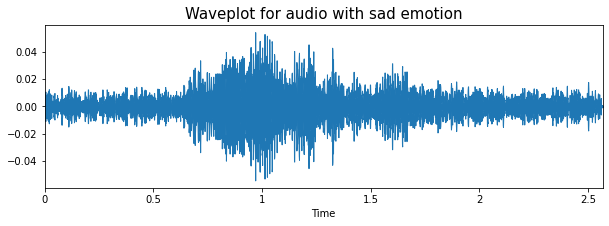

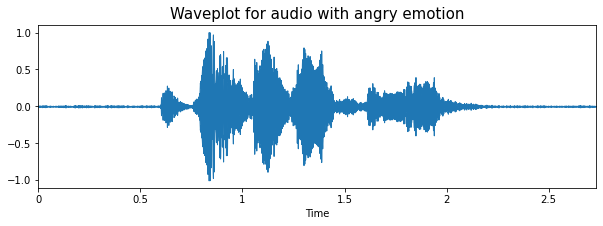

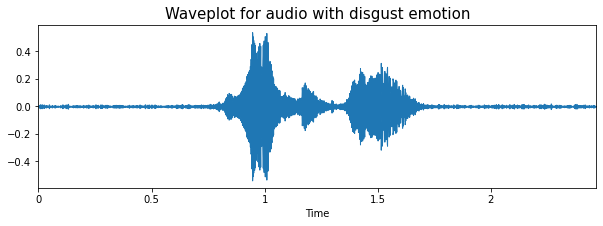

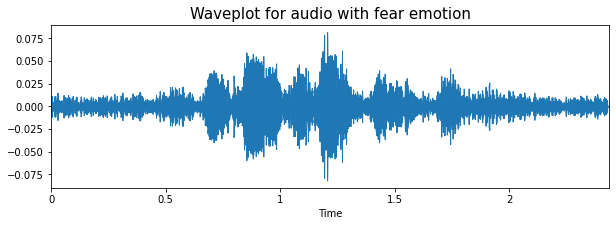

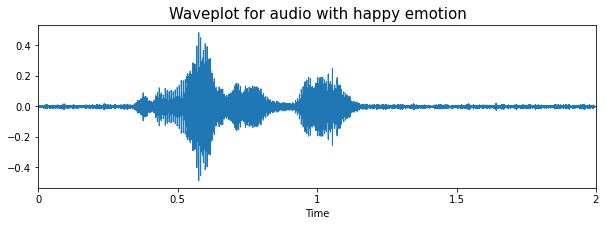

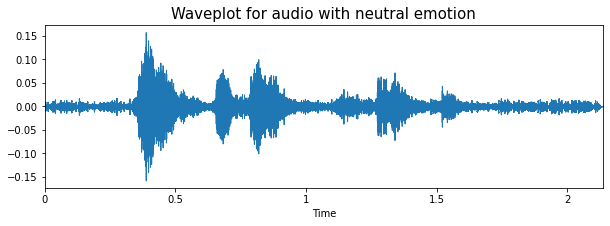

In [ ]:
processing_wav('sad')
processing_wav('angry')
processing_wav('disgust')
processing_wav('fear')
processing_wav('happy')
processing_wav('neutral')

#Fixing the length of audio signals

In [ ]:
length_arr = []
sum = 0
for wav in range(len(df.Path)):
  data, sr = load_path(df, wav)
  signal_length = len(data)
  sum = sum + signal_length
  length_arr.append(signal_length)
shortest_wav_index = np.argmin(length_arr) 
#print(length_arr) 
#shortest_wav_length=length_arr[shortest_wav_index]
avg_length = sum / len(df.Path)
print(shortest_wav_index)
print('average length' , avg_length)

2839
average length 43676.39384574039


In [ ]:
for wav in range(len(df.Path)):
  # data, sr = load_path(df, wav)
  length = len(data_list[wav])
  if length > avg_length:
    data_list[wav] = data_list[wav][:math.ceil(avg_length)]
  else:
    pad_value = math.ceil(avg_length - length)
    pad_array = [0]*pad_value
    data_list[wav] = np.append(data_list[wav],pad_array)    
print(len(data_list))
print(len(data_list[400]))
print(len(data_list[255]))

7442
43677
43677


In [ ]:
# data_short, sr = load_path(df, shortest_wav_index)
# shortest_len = len(data_short)
# #print(shortest_len)
# new_data=[]
# new_labels=[]
# for wav in range(len(df.Path)):
#   data,sr=load_path(df,wav)
#   start=0
#   end=shortest_len

#   while end<=len(data):
#     new_data.append(data[start:end])
#     #print(len(new_data))
#     new_labels.append(label_array[wav])
#     start+=shortest_len
#     end+=shortest_len
#     print(len(data))
#   if start<len(data):
#       padding_value=shortest_len-((signal_length)-start)
#       print('SHORTEST LENGTH', shortest_len)
#       print('SIGNAL LENGTH', signal_length)
#       print('START' , start)
#       print('PADDING', padding_value)
#       new_data.append(np.pad(data,padding_value))[start:]
#       new_labels.append(label_array[wav])
# for i in range(len(new_data)):
#    print(len(new_data[i]))

  
  #print(new_labels)


#Feature Extraction

In [ ]:
def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length

def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)

def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)    

In [ ]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    #feature1 = np.array([])
    #feature1 = []
    feature1 = np.concatenate((
                        np.array(np.mean(energy(data, frame_length, hop_length))),
                        np.array(np.mean(zcr(data, frame_length, hop_length))),
                        np.array(np.mean(chroma_stft(data, sr, frame_length, hop_length))),
                        np.array(np.mean(mfcc(data, sr, frame_length, hop_length)))), axis = None)
    #print(feature1.shape)
    return feature1

In [ ]:
def get_features(data, sr):
  result = []
  res = extract_features(data, sr)
  #result = np.array(res)
  result.append(res)
  #x = len(result)
  #print(x)
  return result

In [ ]:
feature_space1_data = []
feature_space1_labels = []
for i in range(len(data_list)):
     #data, sampling_rate = load_path(df, i)
    #  print(data_list[i].shape)
    #  print(sr_list[i].shape)
     feature_space1_data.append(extract_features(data_list[i], sr_list[i])) 
     feature_space1_labels.append(df.Emotion.iloc[i])
print(len(feature_space1_data))
print(feature_space1_data[1])
print(feature_space1_data[20])
print(len(feature_space1_labels))

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


7442
[ 2.63606330e-03  1.12344431e-01  5.70264465e-01 -1.15241908e+01]
[ 7.96825552e-05  6.67980105e-02  7.01297104e-01 -1.17531004e+01]
7442


In [ ]:
print(np.array(feature_space1_data).shape)

(7442, 4)


In [ ]:
# def extract_spectral_features(audio,sample_rate):
#   sgram = np.abs(librosa.stft(audio))
#   sgram_mag, _ = librosa.magphase(sgram)
#   mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
#   #chroma = librosa.feature.chroma_stft(S=sgram, sr=sample_rate)
#   #librosa.display.specshow(mel_scale_sgram)
#   return mel_scale_sgram,chroma

In [ ]:
def get_features2(data, sr,frame_length=2048, hop_length=512):
   sgram = np.abs(librosa.stft(data))
   sgram_mag, _ = librosa.magphase(sgram)
   mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
   #feature2 =mel_spc(sgram_mag, sr, frame_length, hop_length)
   #mel.append(feature2)
   return mel_scale_sgram

In [ ]:
x=get_features2(data_list[1],sr_list[1])
print(x.shape)

(128, 86)


In [ ]:
# for i in range(10):
#      data, sampling_rate = load_path(df, i)
#      f = feature_space2(data, sampling_rate)
#      print(f)

[0.14858861]
[0.6671572]
[2.8520825]
[0.7132807]
[0.02714533]
[0.08603618]
[0.023567222]
[0.21188325]
[0.14383565]
[1.3178566]


In [ ]:
feature_space2_data = []
feature_space2_labels = []
for i in range(len(data_list)):
     #data, sampling_rate = load_path(df, i)
     feature_space2_data.append(get_features2(data_list[i], sr_list[i]))
     feature_space2_labels.append( df.Emotion.iloc[i])
print(len(feature_space2_data))
print(len(feature_space2_labels))

7442
7442


In [ ]:
print(len(feature_space2_data))

7442


In [ ]:
print(feature_space2_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(type(data))
print(len(data))
label_array=np.array(label_array)
label_array.reshape(-1,1)

<class 'numpy.ndarray'>
55125


array([['angry'],
       ['angry'],
       ['neutral'],
       ...,
       ['angry'],
       ['disgust'],
       ['sad']], dtype='<U7')

#Building the model

> 



#1.splitting the data


In [ ]:
X1_train_70, X1_test_30, y1_train_70, y1_test_30 = train_test_split(feature_space1_data, feature_space1_labels, test_size = 0.3, random_state = 42, stratify = feature_space1_labels)

In [ ]:
X1_train_65, X1_val_5, y1_train_65, y1_val_5 = train_test_split(X1_train_70, y1_train_70, test_size = 0.05, random_state = 42, stratify = y1_train_70)

In [ ]:
X2_train_70, X2_test_30, y2_train_70, y2_test_30 = train_test_split(feature_space2_data, feature_space2_labels, test_size = 0.3, random_state = 42, stratify = feature_space2_labels)

In [ ]:
X2_train_65, X2_val_5, y2_train_65, y2_val_5 = train_test_split(X2_train_70, y2_train_70, test_size = 0.05, random_state = 42, stratify = y2_train_70)

In [ ]:
from keras import layers
from keras import models
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import utils

In [ ]:
le = LabelEncoder()
#one-hot encode target column
y1_train = utils.to_categorical(le.fit_transform(y1_train_65))
y1_test = utils.to_categorical(le.fit_transform(y1_test_30))
y1_val = utils.to_categorical(le.fit_transform(y1_val_5))
y2_train = utils.to_categorical(le.fit_transform(y2_train_65))
y2_test = utils.to_categorical(le.fit_transform(y2_test_30))
y2_val = utils.to_categorical(le.fit_transform(y2_val_5))

In [ ]:
X1_train_65 = np.array(X1_train_65)
y1_train_65 = np.array(y1_train_65)
X1_val_5 = np.array(X1_val_5)
y1_val_5 = np.array(y1_val_5)
X1_test_30 = np.array(X1_test_30)

In [ ]:
X1_train = X1_train_65.reshape(X1_train_65.shape[0],X1_train_65.shape[1],1)
X1_val = X1_val_5.reshape(X1_val_5.shape[0],X1_val_5.shape[1],1)
X1_test = X1_test_30.reshape(X1_test_30.shape[0],X1_test_30.shape[1],1)

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same',
                 activation='relu', input_shape=(np.array(X1_train).shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 256)            1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 256)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 256)            327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 256)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 128)           0

In [ ]:
# for i in range(len(y1_train_65)):
#   if y1_train_65[i]=="angry":
#     y1_train_65[i]=0
#   elif y1_train_65[i]=="sad":
#     y1_train_65[i]=1
#   elif y1_train_65[i]=="fear":
#     y1_train_65[i]=2
#   elif y1_train_65[i]=="disgust":
#     y1_train_65[i]=3
#   elif y1_train_65[i]=="happy":
#     y1_train_65[i]=4
#   elif y1_train_65[i]=="neutral":
#     y1_train_65[i]=5    

# print(y1_train_65)

 


['0' '1' '2' ... '0' '3' '4']


In [ ]:
history=model.fit(X1_train, y1_train, batch_size=32, epochs=50, validation_data=(X1_val, y1_val))

Epoch 1/50
155/155 [==============================] - 9s 50ms/step - loss: 1.7928 - accuracy: 0.1783 - val_loss: 1.7862 - val_accuracy: 0.1686
Epoch 2/50
155/155 [==============================] - 7s 47ms/step - loss: 1.7855 - accuracy: 0.1831 - val_loss: 1.7699 - val_accuracy: 0.1686
Epoch 3/50
155/155 [==============================] - 7s 47ms/step - loss: 1.7704 - accuracy: 0.2191 - val_loss: 1.7693 - val_accuracy: 0.1992
Epoch 4/50
155/155 [==============================] - 7s 48ms/step - loss: 1.7444 - accuracy: 0.2316 - val_loss: 1.7511 - val_accuracy: 0.2107
Epoch 5/50
155/155 [==============================] - 7s 48ms/step - loss: 1.7173 - accuracy: 0.2401 - val_loss: 1.6861 - val_accuracy: 0.3142
Epoch 6/50
155/155 [==============================] - 7s 48ms/step - loss: 1.7084 - accuracy: 0.2609 - val_loss: 1.6805 - val_accuracy: 0.2989
Epoch 7/50
155/155 [==============================] - 7s 48ms/step - loss: 1.7053 - accuracy: 0.2561 - val_loss: 1.6988 - val_accuracy: 0.2529

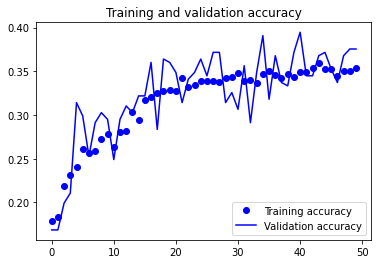

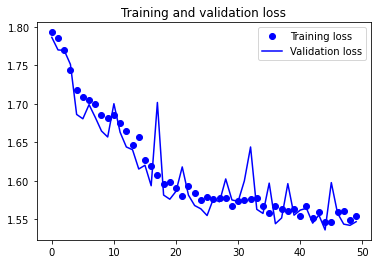

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#2D Model

In [ ]:
X2_train_65 = np.array(X2_train_65)
y2_train_65 = np.array(y2_train_65)
X2_val_5 = np.array(X2_val_5)
y2_val_5 = np.array(y2_val_5)

In [ ]:
x_train_2d = np.expand_dims(X2_train_65, axis=3)
x_val_2d = np.expand_dims(X2_val_5, axis=3)
x_test_2d = np.expand_dims(X2_test_30, axis=3)

In [ ]:
print(x_train_2d.shape)

(4948, 128, 86, 1)


In [ ]:
# x_train_2d = X2_train_65.reshape(X2_train_65.shape[0],X2_train_65.shape[1],X2_train_65.shape[2],1)
# x_val_2d = X2_val_5.reshape(X2_val_5.shape[0],X2_val_5.shape[1],X2_val_5.shape[2],1)

In [ ]:
model_spect = Sequential()
model_spect.add(Conv2D(32, kernel_size =(5, 5), strides =(1, 1),
                 activation ='relu', input_shape=(128, 86, 1)))
model_spect.add(MaxPooling2D(pool_size =(2, 2), strides =(2, 2)))
model_spect.add(Conv2D(64, (5, 5), activation ='relu'))
model_spect.add(MaxPooling2D(pool_size =(2, 2)))
model_spect.add(Flatten())
model_spect.add(Dense(1000, activation ='relu'))
model_spect.add(Dense(6, activation ='softmax'))

model_spect.compile(loss=tf.keras.losses.categorical_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])

model_spect.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 82, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 41, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 37, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33408)             0         
                                                                 
 dense_2 (Dense)             (None, 1000)             

In [ ]:
history_2d = model_spect.fit(x_train_2d, y2_train,
                                batch_size=32, epochs=25, validation_data=(x_val_2d, y2_val))

Epoch 1/25
155/155 [==============================] - 158s 1s/step - loss: 1.4821 - accuracy: 0.3866 - val_loss: 1.4313 - val_accuracy: 0.3755
Epoch 2/25
155/155 [==============================] - 159s 1s/step - loss: 1.3298 - accuracy: 0.4677 - val_loss: 1.3227 - val_accuracy: 0.4521
Epoch 3/25
155/155 [==============================] - 170s 1s/step - loss: 1.1723 - accuracy: 0.5378 - val_loss: 1.2569 - val_accuracy: 0.5364
Epoch 4/25
155/155 [==============================] - 159s 1s/step - loss: 0.9692 - accuracy: 0.6257 - val_loss: 1.3373 - val_accuracy: 0.5134
Epoch 5/25
155/155 [==============================] - 157s 1s/step - loss: 0.7200 - accuracy: 0.7264 - val_loss: 1.6943 - val_accuracy: 0.4789
Epoch 6/25
155/155 [==============================] - 157s 1s/step - loss: 0.5047 - accuracy: 0.8175 - val_loss: 1.8758 - val_accuracy: 0.4866
Epoch 7/25
155/155 [==============================] - 157s 1s/step - loss: 0.3793 - accuracy: 0.8696 - val_loss: 2.4664 - val_accuracy: 0.4636

#1-D evaluation

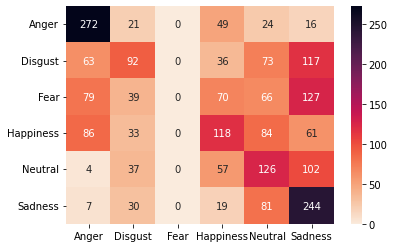

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred_time = model.predict(X1_test)
matrix_time = confusion_matrix(np.array(y1_test).argmax(axis=1), y_pred_time.argmax(axis=1))
ax = sns.heatmap(matrix_time, annot=True, fmt="d", cmap = 'rocket_r',
                 xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'],
                 yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

In [ ]:
print(y1_test)

In [ ]:
print(y_pred_time)

In [ ]:
print(classification_report(y1_test.argmax(axis=1), y_pred_time.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.53      0.71      0.61       382
           1       0.37      0.24      0.29       381
           2       0.00      0.00      0.00       381
           3       0.34      0.31      0.32       382
           4       0.28      0.39      0.32       326
           5       0.37      0.64      0.47       381

    accuracy                           0.38      2233
   macro avg       0.31      0.38      0.34      2233
weighted avg       0.31      0.38      0.34      2233



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2D Evaluation

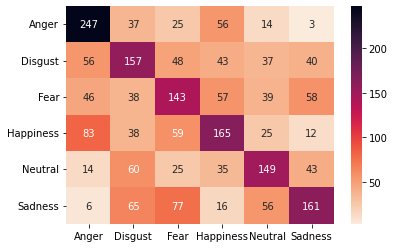

In [ ]:
y_pred_spect = model_spect.predict(x_test_2d)
matrix_spect = confusion_matrix(y2_test.argmax(axis=1), y_pred_spect.argmax(axis=1))
ax = sns.heatmap(matrix_spect, annot=True, fmt="d", cmap = 'rocket_r',
                 xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'],
                 yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

In [ ]:
print(classification_report(y2_test.argmax(axis=1), y_pred_spect.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.55      0.65      0.59       382
           1       0.40      0.41      0.40       381
           2       0.38      0.38      0.38       381
           3       0.44      0.43      0.44       382
           4       0.47      0.46      0.46       326
           5       0.51      0.42      0.46       381

    accuracy                           0.46      2233
   macro avg       0.46      0.46      0.46      2233
weighted avg       0.46      0.46      0.46      2233



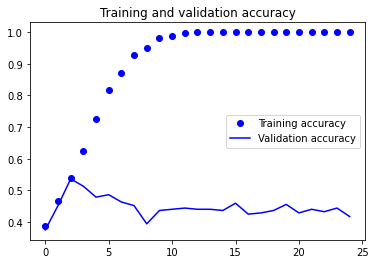

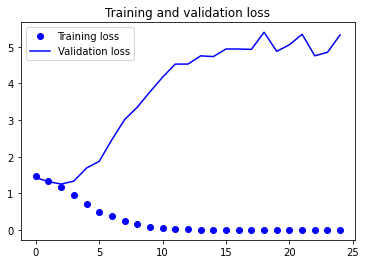

In [ ]:
accuracy_2d = history_2d.history['accuracy']
val_accuracy_2d = history_2d.history['val_accuracy']
loss_2d = history_2d.history['loss']
val_loss_2d = history_2d.history['val_loss']
epochs_2d = range(len(accuracy_2d))
plt.plot(epochs_2d, accuracy_2d, 'bo', label='Training accuracy')
plt.plot(epochs_2d, val_accuracy_2d, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_2d, loss_2d, 'bo', label='Training loss')
plt.plot(epochs_2d, val_loss_2d, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()